In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKerasTF
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Dataset\boston.csv")
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x=df.drop(columns="HOUSEPRICE")
y=df.HOUSEPRICE
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [4]:
stdSc=StandardScaler()
stdSc.fit(x_train)
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

In [12]:
df.shape

(506, 13)

In [13]:
model=Sequential()
model.add(Dense(64,activation="relu")) # Hidden layer with 64 nodes
model.add(Dense(32,activation="relu")) #output layer

#compile model
model.compile(loss="mse",optimizer="adam",metrics=['mae'])

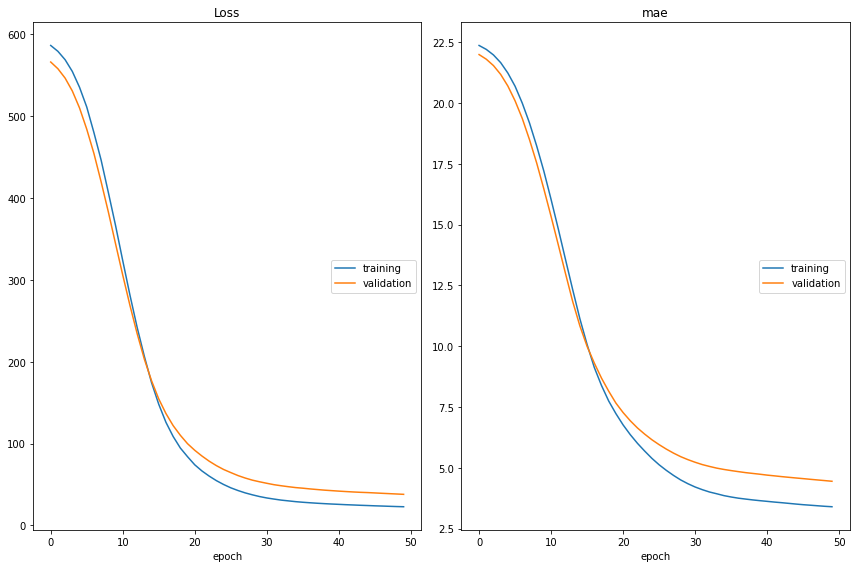

Loss
	training         	 (min:   22.911, max:  586.171, cur:   22.911)
	validation       	 (min:   38.060, max:  565.962, cur:   38.060)
mae
	training         	 (min:    3.398, max:   22.368, cur:    3.398)
	validation       	 (min:    4.445, max:   21.994, cur:    4.445)
12/12 [==============================] - 0s 28ms/step - loss: 22.9112 - mae: 3.3978 - val_loss: 38.0602 - val_mae: 4.4452


In [14]:
result=model.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                832       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________


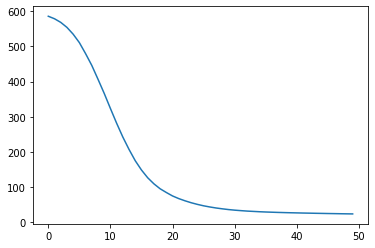

In [16]:
plt.plot(result.history['loss'])

In [17]:
y_pred = model.predict(x_test_std)

In [18]:
model.save("boston_nn.h5")